# Heart Disease UCI

![Header](https://storage.googleapis.com/kaggle-datasets-images/33180/43520/718447d8c4f7e29f129c25b44b324efa/dataset-cover.jpg?t=2018-06-25-11-44-45)

# Giriş
<a id="toc"></a>

Bu kernelda [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) veri setini inceleyeceğiz. Bu veri seti içerisindeki değişkenler üzerinden hastada kalp hastalığı olup olmadığı tahmin etmeye çalışan bir model oluşturacağız.

Kalp hastalığı ile ilgili risk faktörlerine baktığımızda
* **Değiştirilemeyen başlıca faktörler:**
    * artan yaş
    * cinsiyet
    * kalıtım. 
    > Bu veri setindeki değişkenlerden biri olan **talaseminin**(thal) kalıtım olduğuna dikkat edin.
* **Değiştirilebilecek ana faktörler şunlardır:**
    * Sigara içmek
    * Yüksek kolesterol
    * Yüksek tansiyon
    * Fiziksel hareketsizlik
    * Fazla kilolu olmak
    * Şeker hastası olmak
* **Diğer faktörler arasında stres, alkol ve zayıf diyet / beslenme sayılabilir.**

>Yukarıdaki veriler göz önüne alındığında, modelimiz tahminde bulunabiliyorsa, yukarıdaki faktörlerin önemli olduğunu göreceğiz.

 


**Hedefimiz**, hastada kalp hastalığının varlığını tespit etmektir.


Bu doğrultuda,
* [Logistic Regression](#Logistic-Regression), 
* [K-Nearest Neighbour (KNN) Classification](#K-Nearest-Neighbour-(KNN)-Classification), 
* [Support Vector Machine (SVM) Algorithm](#Support-Vector-Machine-(SVM)-Algorithm), 
* [Naive Bayes Algorithm](#Naive-Bayes-Algorithm), 
* [Decision Tree Algorithm](#Decision-Tree-Algorithm), 
* [Random Forest Classification](#Random-Forest-Classification) 
algoritmalarını kullanacağız.



# İçindekiler
1. [Giriş](#Giriş)
2. [Hazırlık](#Hazırlık)
    1. [Kütüphanelerin Yüklenmesi](#Kütüphanelerin-Yüklenmesi)
    2. [Verinin Çağırılması](#Verinin-çağırılması)
    3. [Değişkenler](#Değişkenler)
3. [Keşifçi Veri Analizi ve Veri Görselleştirme](#Keşifçi-Veri-Analizi-ve-Veri-Görselleştirme)
    1. [Hasta olanlar ve olmayanların dağılımı](#Hasta-olanlar-ve-olmayanların-dağılımı)
        1. [Hasta olanlar ve olmayanların yüzdelik dağılımları](#Hasta-olanlar-ve-olmayanların-yüzdelik-dağılımları)
    2. [Veri setimizdeki cinsiyet dağılımı](#Veri-setimizdeki-cinsiyet-dağılımı)
    3. [Hastalık durumuna göre diğer değişkenlerin ortalama değerleri](#Hastalık-durumuna-göre-diğer-değişkenlerin-ortalama-değerleri)
    4. [Yaşlara göre Kalp Rahatsızlığı olup olmaması](#Yaşlara-göre-Kalp-Rahatsızlığı-olup-olmaması)
    5. [Cinsiyete göre Kalp rahatsızlığı olup olmaması](#Cinsiyete-göre-Kalp-rahatsızlığı-olup-olmaması)
    6. [Maksimum Kalp Atış Hızı ve Yaş Arasında Hastalık Dağılımı](#Maksimum-Kalp-Atış-Hızı-ve-Yaş-Arasında-Hastalık-Dağılımı)
    7. [Slope Değişkenine Göre Hastalık Sıklığı](#Slope-Değişkenine-Göre-Hastalık-Sıklığı)
    8. [Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı](#Açlık-Kan-Şekerine-Göre-Kalp-Hastalığı-Sıklığı)
    9. [Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı](#Göğüs-Ağrısı-Tipine-Göre-Halp-Hastalığı-Sıklığı)
4. [Kategorik Değişkenlerin Dönüştürülmesi](#Kategorik-Değişkenlerin-Dönüştürülmesi)
5. [Modelin Uygulanması](#Modelin-Uygulanması)
    1. [Logistic Regression](#Logistic-Regression)
        1. [Normelleştirme](#Normelleştirme)
    2. [K-Nearest Neighbour (KNN) Classification](#K-Nearest-Neighbour-(KNN)-Classification)
        1. [En iyi n_neighbors değerini bulma](#En-iyi-n_neighbors-değerini-bulma)
    3. [Support Vector Machine (SVM) Algorithm](#Support-Vector-Machine-(SVM)-Algorithm)
    4. [Naive Bayes Algorithm](#Naive-Bayes-Algorithm)
    5. [Decision Tree Algorithm](#Decision-Tree-Algorithm)
    6. [Random Forest Classification](#Random-Forest-Classification)

# Hazırlık
<a id="toc"></a>
Kütüphanelerin yüklenmesi ve verinin çağırılması.

## Kütüphanelerin Yüklenmesi
<a id="toc"></a>

Kullandığımız kütüphanelerin yüklenmesi.

In [1]:
# Temel Kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import seaborn as sns #for plotting
import matplotlib.pyplot as plt

# Model Kurma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing


## Verinin çağırılması
<a id="toc"></a>

> Bu aşamada verimizi içeri alıyoruz ardından değişkenlerin kısaltmalarının anlamlarını ve hangi değerleri aldığını açıklıyoruz.

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
# Verimize bakalım.
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Değişkenler
<a id="toc"></a>

Verimize yakından baktığımızda oldukça temiz bir yapısı olduğunu görüyoruz. Eksik değerlerin kontrolü ve boyutlarına bakmadan önce değişkenlerin kısaltmalarını açıklayalım. [Türkçe Açıklamaları](#Türkçeleri)

1. **age:** The person's age in years
2. **sex:** The person's sex (1 = male, 0 = female)
* **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
* **chol:** The person's cholesterol measurement in mg/dl
* **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach:** The person's maximum heart rate achieved
* **exang:** Exercise induced angina (1 = yes; 0 = no)
* **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **ca:** The number of major vessels (0-3)
* **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **target: Heart disease (0 = no, 1 = yes)**


### Türkçeleri
<a id="toc"></a>
1. Yaş
2. Cinsiyet
3. Göğüs ağrısı tipi (4 değer)
4. Dinlenme kan basıncı
5. Serum kolestrolü (mg / dl)
6. Açlık kan şekeri (>120 mg / dl)
7. Elektrokardiyografik sonuçların dinlenmesi (değerler 0,1,2)
8. Elde edilen maksimum kalp atış hızı
9. Egzersize bağlı Anjin (Anjin, kalbe kan akışının azalmasından kaynaklanan bir tür göğüs ağrısıdır.)
10. Eski tepe noktası = istirahate bağlı egzersiz ile indüklenen ST depresyonu
11. Tepe egzersizi ST segmentinin eğimi
12. floroskopi ile renklendirilmiş ana damarların sayısı (0-3)
13. thal: 
    * 3 = normal
    * 6 = sabit hata
    * 7 = tersinir defekt

# Keşifçi Veri Analizi ve Veri Görselleştirme
<a id="toc"></a>

Bu bölümde değişkenlere ait değerleri ve değişkenlerin kendi içerisindeki karşılaştırmalarına bakacağız. Ardından değişken içerisindeki değerlerin karşılaştırmalı grafiğini çizdireceğiz.

## Hasta olanlar ve olmayanların dağılımı
Burada **1** ile gösterilenler kalp hastalığı olanları, **0** ile gösterilenler ise kalp rahatsızlığı olmayanları verir.

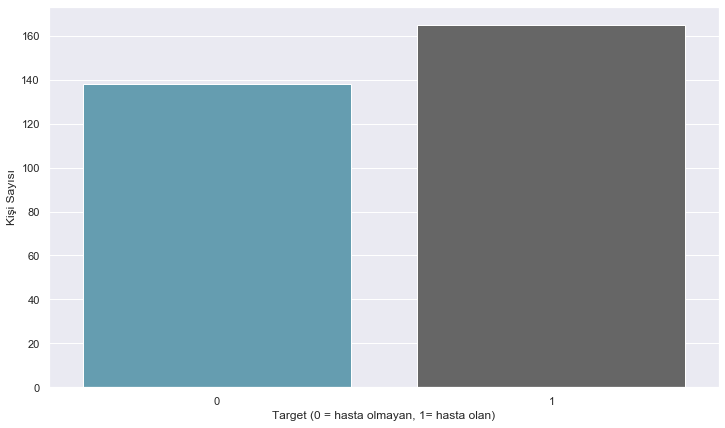

In [4]:
# seaborn
color = ["#58a3bc","#666666"]
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x="target",
              data=df,
              palette=color)
plt.ylabel("Kişi Sayısı")
plt.xlabel("Target (0 = hasta olmayan, 1= hasta olan)")



plt.savefig('Hastalık.png',transparent=True)
plt.show()

## Hasta olanlar ve olmayanların yüzdelik dağılımları

In [5]:
countNoDisease = len(df[df.target == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.target == 1]) # hastalığı olanların sayısı

print("Kalp Rahatsızlığı olmayan hastaların yüzdesi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Rahatsızlığı olan hastaların yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Kalp Rahatsızlığı olmayan hastaların yüzdesi: 45.54%
Kalp Rahatsızlığı olan hastaların yüzdesi: 54.46%


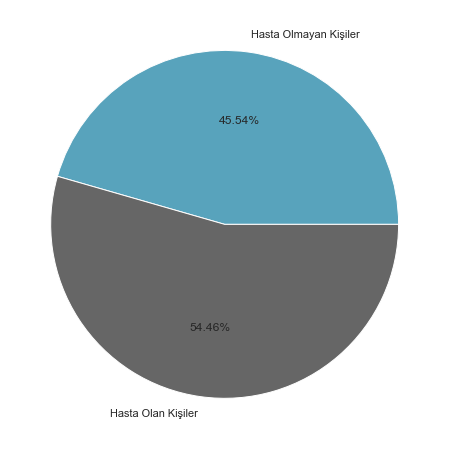

In [6]:
plt.figure(figsize=(8,8))
color = ["#58a3bc","#666666"]
plt.pie([countNoDisease,countHaveDisease],
        labels=["Hasta Olmayan Kişiler","Hasta Olan Kişiler"],
        colors=color,
        autopct='%1.2f%%');


plt.savefig('Hastalık1.png',transparent=True)

## Veri setimizdeki cinsiyet dağılımı

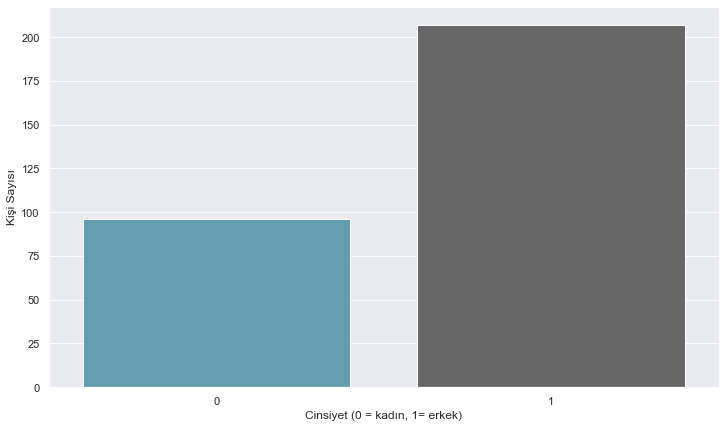

In [7]:
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x='sex', data=df, palette=color)
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel("Kişi Sayısı")
plt.savefig('cinsiyet.png',transparent=True)

plt.show()

In [8]:
countFemale = len(df[df.sex == 0]) # kadınların sayısı
countMale = len(df[df.sex == 1]) # erkeklerin sayısı
print("Kadın hastaların yüzdesi: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Erkek hastaların yüzdesi: {:.2f}%".format((countMale / (len(df.sex))*100)))

Kadın hastaların yüzdesi: 31.68%
Erkek hastaların yüzdesi: 68.32%


## Hastalık durumuna göre diğer değişkenlerin ortalama değerleri

Hastalık durumuna göre bir gruplandırma işlemi yapılmıştır.

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


## Yaşlara göre Kalp Rahatsızlığı olup olmaması

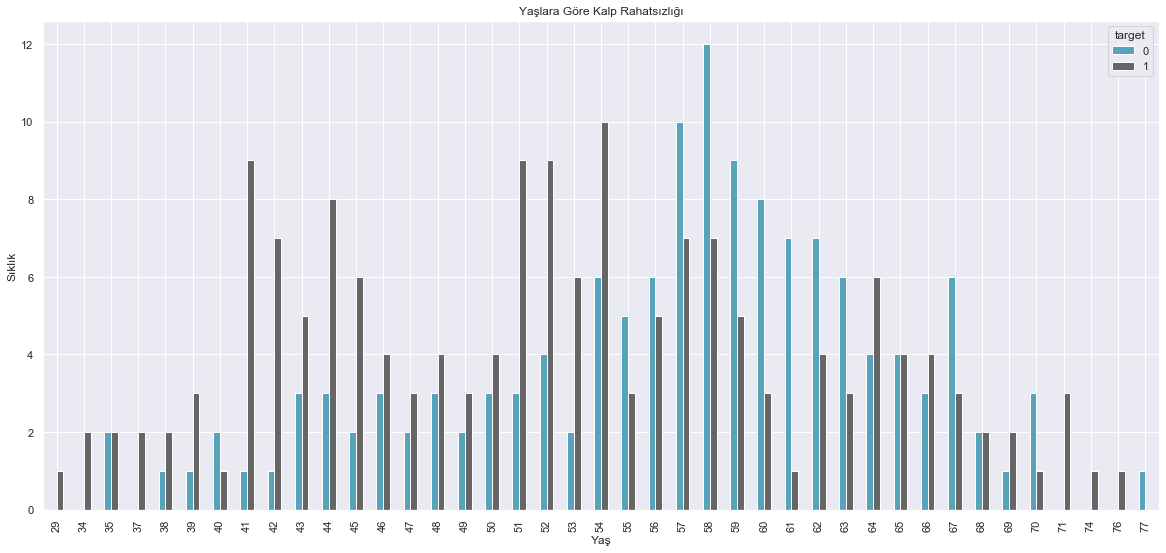

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,9),color=color)
plt.title('Yaşlara Göre Kalp Rahatsızlığı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.savefig('heartDiseaseAndAges.png',transparent=True)
plt.show()

## Cinsiyete göre Kalp rahatsızlığı olup olmaması

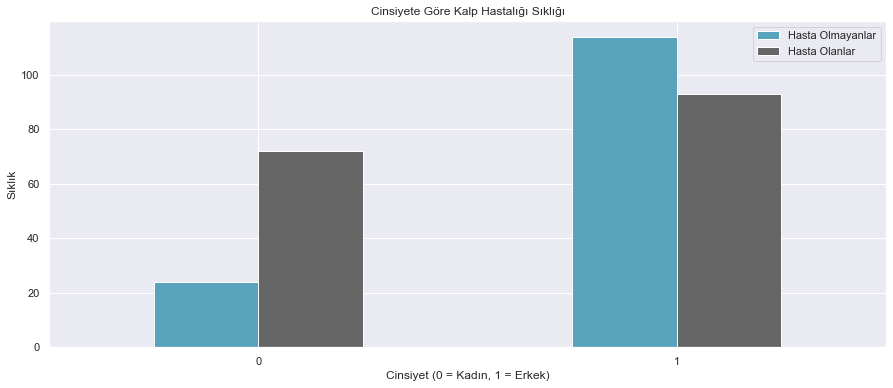

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Cinsiyete Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.legend(["Hasta Olmayanlar", "Hasta Olanlar"])
plt.ylabel('Sıklık')
plt.savefig('cinsiyetegörehastalık.png',transparent=True)


plt.show()

## Maksimum Kalp Atış Hızı ve Yaş Arasında Hastalık Dağılımı

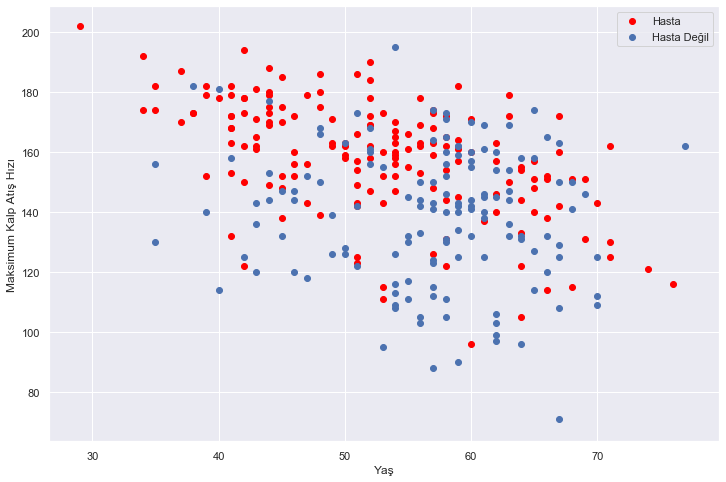

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Hasta", "Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maksimum Kalp Atış Hızı")
plt.show()

## Slope Değişkenine Göre Hastalık Sıklığı

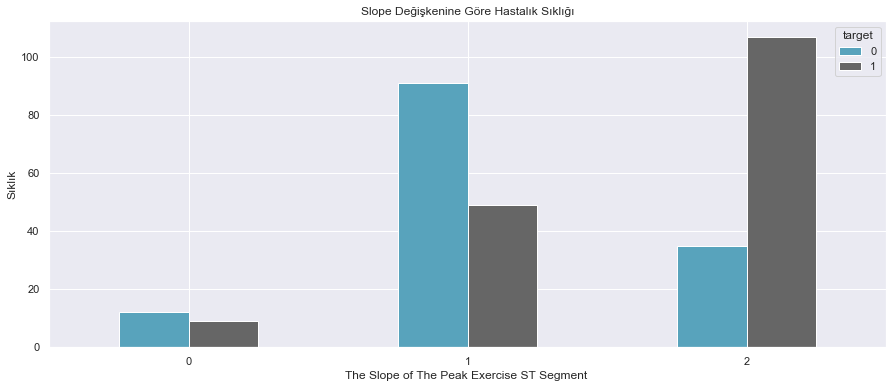

In [13]:
color = ["#58a3bc","#666666"]
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Slope Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.savefig('slope.png',transparent=True)


plt.show()

## Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı

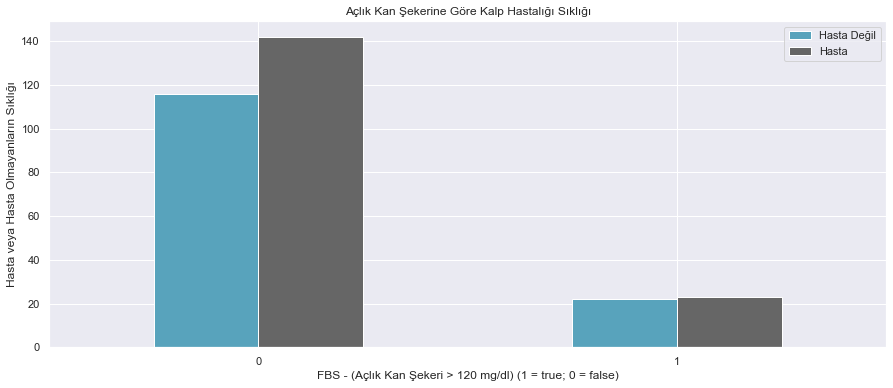

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı')
plt.xlabel('FBS - (Açlık Kan Şekeri > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Hasta Değil", "Hasta"])
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('açlık.png',transparent=True)


plt.show()

## Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı

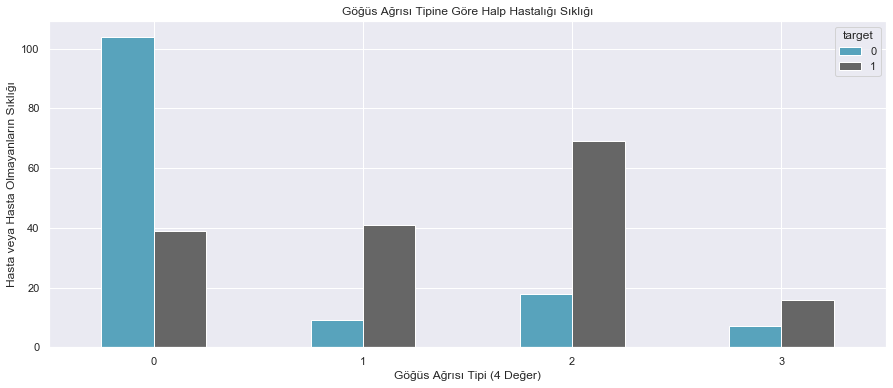

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı')
plt.xlabel('Göğüs Ağrısı Tipi (4 Değer)')
plt.xticks(rotation = 0)
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('göğüs.png',transparent=True)


plt.show()

# Kategorik Değişkenlerin Dönüştürülmesi

Makine öğrenmesi kısmına geçmeden önce veri setimiz içerisinde bulunan kategorik değişkenlerin dönüştürülmesi gerekmektedir.

Bunun için hangi değişkenlerin kategorik olduğunu ve ölçek türlerini saptamalıyız.

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


İlk bakışta **sex, cp, fbs, testecg, exang, slope, ca ve thal** değişkenlerinin kategorik olduklarını görüyoruz. 

Şimdi bu değişkenlerin değerlerine **.uniqe()** metodu yardımıyla bakalım. Eğer **0 - 1** haricinde değerler almışlarsa onları **Nominal ve Ordinal** olarak ayıralım. **Nominal** ölçek türüne sahip değişkenleri **get_dummies() metoduyla** tekrardan şekillendirelim. 

Çünkü örneğin **0 ve 1** makine için bir ast-üst oluşturmazken içerisinde **0, 1, 2** değerlerini almış bir nominal değişken makinede, **2** değerinin **1** değerinin iki katı gibi bir intiba bırakabilir. Oysa burada **0, 1 ve 2** ile anlatılmak istenen hepsinin ayrı birer **kategorik değişken** olduğudur yani bizim için bunlar arasında bir *ast-üst* ilişkisi yoktur. 

**Bu sebeple eğer dönüştürme işlemini yapmazsak modelimizin yanlış eğitilmesi söz konusu olacaktır.**

In [17]:
print("""
Sex değişkeni eşsiz değerleri: {}
Cp değişkeni eşsiz değerleri: {}
Fbs değişkeni eşsiz değerleri: {}
Restecg değişkeni eşsiz değerleri: {}
Exang değişkeni eşsiz değerleri: {}
Slope değişkeni eşsiz değerleri: {}
Ca değişkeni eşsiz değerleri: {}
Thal değişkeni eşsiz değerleri: {}
""".format(df.sex.unique(),
           df.cp.unique(),
           df.fbs.unique(),
           df.restecg.unique(),
           df.exang.unique(),
           df.slope.unique(),
           df.ca.unique(),
           df.thal.unique()))


Sex değişkeni eşsiz değerleri: [1 0]
Cp değişkeni eşsiz değerleri: [3 2 1 0]
Fbs değişkeni eşsiz değerleri: [1 0]
Restecg değişkeni eşsiz değerleri: [0 1 2]
Exang değişkeni eşsiz değerleri: [0 1]
Slope değişkeni eşsiz değerleri: [0 2 1]
Ca değişkeni eşsiz değerleri: [0 2 1 3 4]
Thal değişkeni eşsiz değerleri: [1 2 3 0]



Burada **cp, restecg, slope, ca ve thal** değişkenlerinin **0 - 1** haricinde değerlere sahip olduklarını görüyoruz. Bu değişkenlere **get_dummies()** metodunu uygulamadan önce *tiplerine* bakalım. **get_dummies()** metodu obje yada categorik tipleri dönüştürdüğü için içerisinde numerik tipe sahip değişkenlerin dönüşümlerini gerçekleştirelim.

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Değişkenlerin Kategorik tiplere dönüştürülmesi.

In [19]:
df.cp = pd.Categorical(df.cp)
df.restecg = pd.Categorical(df.restecg)
df.slope = pd.Categorical(df.slope)
df.ca = pd.Categorical(df.ca)
df.thal = pd.Categorical(df.thal)

In [20]:
df.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

Artık **get_dummies()** metodunu kullanabiliriz. 

> `drop_first=True` paremetresi dönüştürülen değişkenlerin çıkartılması işini üstlenecek

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
df = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
         'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
         'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
         'thal_3','target']]

In [23]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,0,0,0,0,0,1,0,1
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,0,0,...,0,1,0,0,0,0,0,1,0,1


# Modelin Uygulanması

Makine öğrenmesi kısmına geldik. Bu kısımda `sklearn` kütüphanesi içerisindeki çeşitli sınıflandırma modellerini uygulayacağız ve bunlar arasında bir karşılaştırma yapıcaz.

Modellerin uygulanmasından önce veri setimizi **train ve test** olarak ayıralım.

Bu aşamada %80 eğitim ve %20 test olarak veri setimizi rassal olarak ayırıyoruz.

> Aynı rassal değişkenleri yakalamak için bir `random_state` atıyoruz.

## Logistic Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
                                   df.drop('target', axis=1), # target hariç veri setinin tamamı X
                                   df['target'], # target Y
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))

Test Accuracy 88.52%


/home/tolga/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Modelimin doğruluğu **88.52%** olarak görülüyor.

## Normelleştirme

Bir de değişkenlerimi normalleştirerek sonuçları görelim.

> Normalleştirme her bir değişkenin maksimum ve minimum değerlerini **0-1** arasında gösterir.

In [25]:
X = df.drop('target',axis=1) # X
y = df.target # y

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 90.16%


/home/tolga/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Normelleştirme sonrasında **88.52%** olan sonucum **90.16%** yükseldi.

## K-Nearest Neighbour (KNN) Classification

Tahminlerin gözlem benzerliğine göre yapılmasıdır.

> **Erkan Şirin'in** benzetmesiyle **"Bana arkadaşını söyle sana kim olduğunu söyleyeyim."** yaklaşımıdır.
> 
> Via: Vahit Keskin

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
print("{} NN Score: {:.2f}%".format(knn.n_neighbors, knn_score*100))


2 NN Score: 81.97%


### `n_neighbors = 2` olduğunda skorum: 81.97%

### En iyi n_neighbors değerini bulma

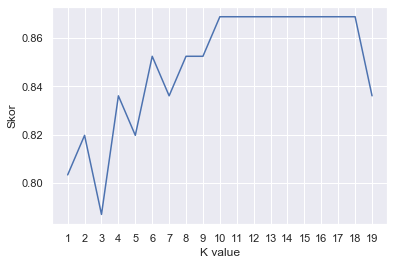

Maximum KNN Score is 86.89%


In [28]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Skor")
plt.savefig('kvalue.png',transparent=True)
plt.show()

knn_score = max(scoreList)
print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

### Maksimum KNN skorum 86.89% 

## Support Vector Machine (SVM) Algorithm 

In [29]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_score*100))

Test Accuracy of SVM Algorithm: 86.89%


/home/tolga/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Naive Bayes Algorithm

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_score = nb.score(X_test,y_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Accuracy of Naive Bayes: 88.52%


## Decision Tree Algorithm

Normalleştirilmemiş veri setiyle daha yüksek skor yakalandı.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 78.69%


## Random Forest Classification

In [32]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score : 78.69%


In [33]:
methods_accuracy = {
    "Logistic Regression":lr_score,
    "KNN" : knn_score,
    "SVM" : svm_score,
    "Naive Bayes" : nb_score,
    "Decision Tree" : dtc_score,
    "Random Forest" : rf_score
}

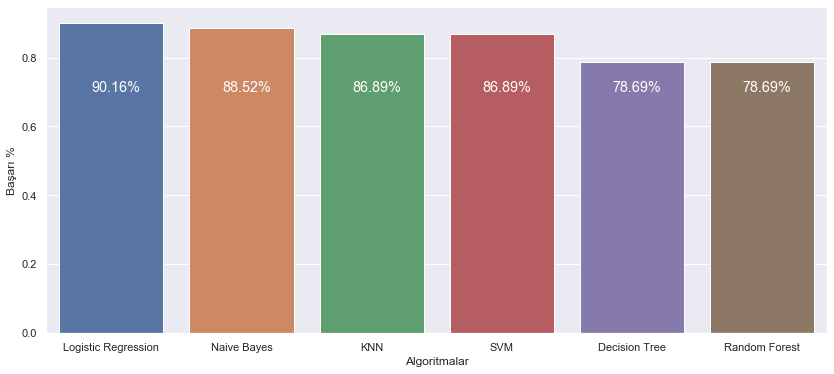

In [45]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest"]
accuracy = [lr_score, nb_score, knn_score, svm_score, dtc_score, rf_score]

sns.set()
plt.figure(figsize=(14,6))
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")
sns.barplot(x=methods, y=accuracy, palette="deep")

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]*100), # yazdırılacak değer
             horizontalalignment='left',
              size='large',
             color="white",
             )

        
plt.savefig('karşılaştır.png',transparent=True)

        
plt.show()